In [1]:
import sys
sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [3]:
backend = provider.get_backend('ibm_perth')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)
job_manager = IBMQJobManager()

In [14]:
parall_qubits = [ 
                    # [ (0,1), (3,5) ],
                    # [ (0,1) ],
                    # [ (3,5) ]
                    # [(1,3),(4,5)],
                    # [(1,3)],
                    # [(4,5)]
                    [(1,2),(5,6)],
                    [(1,2)],
                    [(5,6)]
                ]

In [15]:
qndmt = device_process_measurement_tomography( backend, parall_qubits=parall_qubits )

1054


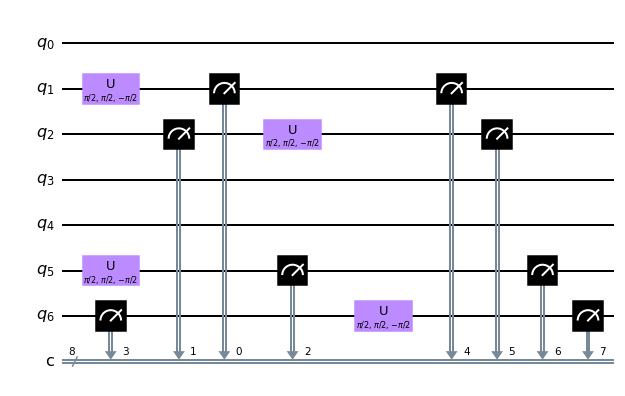

In [16]:
circuits_qndmt = qndmt.circuits()
print( len(circuits_qndmt) )
circuits_qndmt[300].draw(output='mpl')

In [17]:
for _ in range(5):
    job = job_manager.run( transpile( circuits_qndmt, backend ) , backend=backend, shots=2**13 )
    job_id = job.job_set_id()
    print( job_id ) 

53616764a6414a2b9ff1167cac45a93b-1667174047268017
14fba4f0c275412f83ad01aff25b556a-16671740564229283
04064d6a0dd24e9ab533192cfd090d99-16671740654108891
e75aabc0b62c46d1a3d4a73dcdf1a5c3-16671740736617362
67b33fcee6d3409c988361c44ae6cff1-16671740825175252


In [8]:
# ibm_perth
# [ (0,1), (3,5) ]
# '7364c64cb08643c8b7a331db8760be76-16638006144369087'
# 'a317d2f4d40e4138a90e3d867f81aead-16638008680736837'
# '5561e4224aee40b3b5b4589851fa1ade-16638008773492372'
# '798207b0a1b44a32b79cc4dc3ee95aec-16638008859225643'
# 'f548a504154e412c8b8def1e60e8e5a7-16638008944027708'
# [(1,3),(4,5)]
# e311fd95fa1343b49c645b96b2303566-16671739751397412
# 1f04e519ea504f59b0e36b39e3db8238-16671739839581792
# 139fed624e294286aef063dc0c944bc8-1667173992884656
# bcc11d56a06245e69ba804813179c4cf-16671740009086525
# d35909ce634c41e09d45e5314f3bd50b-16671740097822661
# [(1,2),(5,6)] 
# 53616764a6414a2b9ff1167cac45a93b-1667174047268017
# 14fba4f0c275412f83ad01aff25b556a-16671740564229283
# 04064d6a0dd24e9ab533192cfd090d99-16671740654108891
# e75aabc0b62c46d1a3d4a73dcdf1a5c3-16671740736617362
# 67b33fcee6d3409c988361c44ae6cff1-16671740825175252

# ibm_lagos
# '39707da5b9ee4dacaab05e9e965d22e8-1663800646243812'
# 'a1a7838f0632404e909900f15fce8526-16638007891180546'
# 'c0dddc17230b4272b31a22cd046cb2db-16638007977857103'
# '605c3dc4a1f145b4b02d5a220e1b5788-16638008061681159'
# 'ab1f63db09e94bdfb84cac2df9405dee-1663800815185673'

# ibm_nairobi
# '01a05c3bf5c54ab1b0cb04cc404b6b25-16638006748704388'
# '9249d8ef94f34c33a7ce11ea04be6521-1663800697014663'
# 'b4b31535026c4870966426df619bcb07-16638007101601813'
# 'd1d8bd698103401896f66634174e24a9-16638007444391327'
# '7eb90f676f724ed69a7c8e17f19c59bd-16638007534727366'

In [9]:
job_ids = [
    '7364c64cb08643c8b7a331db8760be76-16638006144369087',
'a317d2f4d40e4138a90e3d867f81aead-16638008680736837',
'5561e4224aee40b3b5b4589851fa1ade-16638008773492372',
'798207b0a1b44a32b79cc4dc3ee95aec-16638008859225643',
'f548a504154e412c8b8def1e60e8e5a7-16638008944027708'
]

In [10]:
for job_str in job_ids:
    job = job_manager.retrieve_job_set( job_str, provider )
    print( job.statuses() )

[<JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>]
[<JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>]
[<JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>]
[<JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>]
[<JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>, <JobStatus.DONE: 'job has successfully run'>]


In [11]:
chois_single = []
chois_double = []

for job_str in job_ids:
    job = job_manager.retrieve_job_set( job_str, provider )
    results = job.results().combine_results()
    choi_single, choi_double, gateset  = qndmt.fit( results, paralell=True, gate_set=True ) 
    chois_single.append( choi_single )
    chois_double.append( choi_double )

TypeError: cannot unpack non-iterable Results object

In [ ]:
# results = job.results().combine_results()

In [ ]:
# job = simulator.run( circuits_qndmt, noise_model=noise_model, shots=2**13  )
# results = job.result()

In [ ]:
np.mean( quantities_2_mc, 0 )

array([[0.95759464, 0.91089258, 0.95011478],
       [0.96520985, 0.9480235 , 0.96524885],
       [0.96492596, 0.92079171, 0.95414593],
       [0.96617084, 0.94894539, 0.96559999]])

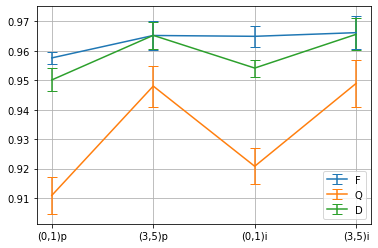

In [ ]:
for j in range(3):
    plt.errorbar( [0,1,2,3], np.mean( quantities_2_mc, 0 )[:,j], yerr=np.std( quantities_2_mc, axis=0 )[:,j], capsize=5 )
plt.xticks( [0,1,2,3], labels=[ '(0,1)p', '(3,5)p', '(0,1)i', '(3,5)i'  ]   )
plt.grid()
plt.legend( ['F','Q', 'D'] )

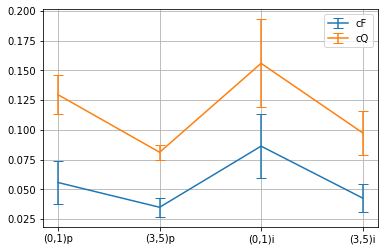

In [ ]:

for j in range(2):
    plt.errorbar( [0,1,2,3], np.mean( cros_quantities_mc, 0 )[:,j], yerr=np.std( cros_quantities_mc, axis=0 )[:,j], capsize=5 )
plt.xticks( [0,1,2,3], labels=[ '(0,1)p', '(3,5)p', '(0,1)i', '(3,5)i'  ]   )
plt.legend( ['cF','cQ'] )
plt.grid()

In [5]:
failed_job = backend.retrieve_job('635f0e7533259661b22f575d')
failed_job.status()

<JobStatus.ERROR: 'job incurred error'>

In [6]:
qobj = failed_job.qobj()
backend.run(qobj, job_name=failed_job.name(), job_tags=failed_job.tags())

C:\Users\lucia\AppData\Local\Temp/ipykernel_6136/3066534036.py:1: DeprecationWarning: The ``IBMQJob.qobj()`` method is deprecated and will be removed in a future release. You can now pass circuits to ``IBMQBackend.run()`` and use ``IBMQJob.circuits()``, ``IBMQJob.backend_options()``, and ``IBMQJob.header()`` to retrieve circuits, run configuration, and Qobj header, respectively.
  qobj = failed_job.qobj()
C:\Users\lucia\AppData\Local\Temp/ipykernel_6136/3066534036.py:2: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  backend.run(qobj, job_name=failed_job.name(), job_tags=failed_job.tags())
